In [1]:
#### NOTEBOOK PURPOSE:
######### MATCH THE MHSAA SCHOOL INFOR DATAFRAME TO THE MCES SCHOOL DATAFRAME

In [2]:
import pandas as pd
import numpy as np
import re
import os
from fuzzywuzzy import process



import tqdm

In [3]:
# Open The two csvs and read them into dataframes

## school master data
school_master = pd.read_csv('../data/school_master_table.csv')

## MHSAA school data
mhsaa_df = pd.read_csv('../data/MHSAA_School_Data_with_Fields.csv')

len(mhsaa_df)

4049

In [4]:
## Filter out of state schools from the MHSAA data
# out of state schools have a ( in the school name
mhsaa_df = mhsaa_df[~mhsaa_df['PopularName'].str.contains('\(')]

# Get rid of the school that says Hockey
mhsaa_df = mhsaa_df[~mhsaa_df['PopularName'].str.contains('Hockey')]

print(len(mhsaa_df))

# Filter 

# Filter out Middle Schools
mhsaa_df = mhsaa_df[~mhsaa_df['PopularName'].str.contains('Middle School')]
print(len(mhsaa_df))
mhsaa_df = mhsaa_df[~mhsaa_df['PopularName'].str.contains('JHS')]
print(len(mhsaa_df))
mhsaa_df = mhsaa_df[~mhsaa_df['PopularName'].str.contains('7/8')]
print(len(mhsaa_df))
mhsaa_df = mhsaa_df[~mhsaa_df['PopularName'].str.contains('7th/8th')]
print(len(mhsaa_df))

# Change the HS in ProposedName to High School
mhsaa_df['ProperName'] = mhsaa_df['ProperName'].str.replace(' HS', ' High School')
mhsaa_df['ProperName'] = mhsaa_df['ProperName'].str.replace(' HS', ' High School')

len(mhsaa_df)

2367
1735
1529
1491
1478


1478

In [5]:
## Filter some of the problem schools out of the school master data
print(len(school_master))

# Filter out the middle schools
school_master = school_master[~school_master['School Name'].str.contains('Middle School')]
print(len(school_master))

# Filter out virtual schools
school_master = school_master[~school_master['School Name'].str.contains('Virtual')]
print(len(school_master))

# Filter out the school that seems to be causing issues it starts with 'High School'.
## Only remove the row if High School is at beginning of the school name



1055
1050
1028


In [6]:
### get a sample of the mhsaa data
# mhsaa_df = mhsaa_df.sample(50)


### Sample of the school master data
# school_master = school_master.sample(20)


In [7]:
########MHSAA ---->>> NCES

## Create new columns in the dataframes for lower case names
mhsaa_df['lower_proper_name'] = mhsaa_df['ProperName'].str.lower()
school_master['lower_school_name'] = school_master['School Name'].str.lower()

# Do the MATCHING and store the score in a column
matches = []

for _, mhsaa_row in tqdm.tqdm(mhsaa_df.iterrows()):
    mhsaa_name = mhsaa_row['lower_proper_name']
    mhsaa_id = mhsaa_row['SchoolId']
    mhsaa_proper_name = mhsaa_row['ProperName']
    mhsaa_popular_name = mhsaa_row['PopularName']
    match = process.extractOne(mhsaa_name, school_master['lower_school_name'])
    if match is None:
        matches.append((None, None, mhsaa_name, mhsaa_id, None, mhsaa_popular_name, mhsaa_proper_name, None))
    else:
        match_name, match_score, _ = match  # Ignore the third return value
        nces_row = school_master.loc[school_master['lower_school_name'] == match_name].iloc[0]
        nces_id = nces_row['u_school_id']
        nces_proper_name = nces_row['School Name']
        matches.append((match_name, match_score, mhsaa_name, mhsaa_id, nces_id, mhsaa_popular_name, mhsaa_proper_name, nces_proper_name))

# Create a dataframe of the matches
matches_df = pd.DataFrame(matches, columns=['match', 'score', 'mhsaa_name', 'mhsaa_id', 'nces_id', 'mhsaa_popular', 'mhsaa_proper', 'nces_proper'])

# Display the matches_df head
# print(matches_df.head())

1478it [01:20, 18.42it/s]


In [8]:
# # NCES ---------> MHSAA
# ## Create new columns in the dataframes for lower case names
# mhsaa_df['lower_proper_name'] = mhsaa_df['ProperName'].str.lower()
# school_master['lower_school_name'] = school_master['School Name'].str.lower()

# # Do the MATCHING and store the score in a column
# matches = []

# for _, nces_row in tqdm.tqdm(school_master.iterrows()):
#     nces_name = nces_row['lower_school_name']
#     nces_id = nces_row['u_school_id']
#     nces_proper_name = nces_row['School Name']
#     match = process.extractOne(nces_name, mhsaa_df['lower_proper_name'])
#     if match is None:
#         matches.append((None, None, nces_name, nces_id, None, None, nces_proper_name, None))
#     else:
#         match_name, match_score, _ = match  # Ignore the third return value
#         mhsaa_row = mhsaa_df.loc[mhsaa_df['lower_proper_name'] == match_name].iloc[0]
#         mhsaa_id = mhsaa_row['SchoolId']
#         mhsaa_proper_name = mhsaa_row['ProperName']
#         mhsaa_popular_name = mhsaa_row['PopularName']
#         matches.append((match_name, match_score, nces_name, nces_id, mhsaa_id, mhsaa_popular_name, nces_proper_name, mhsaa_proper_name))

# # Create a dataframe of the matches
# matches_df = pd.DataFrame(matches, columns=['match', 'score', 'nces_name', 'nces_id', 'mhsaa_id', 'mhsaa_popular', 'nces_proper', 'mhsaa_proper'])

# # Display the matches_df head
# # print(matches_df.head())


In [9]:
matches_df.head(20)

,match,score,mhsaa_name,mhsaa_id,nces_id,mhsaa_popular,mhsaa_proper,nces_proper
0,brighton high school,100,brighton high school,3834,2.60687E+11,Brighton,Brighton High School,Brighton High School
1,high school,90,ewen-trout creek high school,3835,2.62187E+11,Ewen-Trout Creek,Ewen-Trout Creek High School,High School
2,actech high school,86,cherryhill school of performing arts,3836,2.63663E+11,Inkster Cherryhill School of Performing Arts,Cherryhill School of Performing Arts,ACTech High School
3,roseville high school,100,roseville high school,3837,2.63021E+11,Roseville,Roseville High School,Roseville High School
4,shepherd high school,100,shepherd high school,3838,2.63138E+11,Shepherd,Shepherd High School,Shepherd High School
5,cass city jr and sr high school,95,cass city high school,3839,2.6084E+11,Cass City,Cass City High School,Cass City Jr and Sr High School
6,windover high school,92,andover high school,3840,2.60002E+11,Bloomfield Hills Andover,Andover High School,Windover High School
7,high school,90,roeper high school,3841,2.62187E+11,Bloomfield Hills Roeper,Roeper High School,High School
8,high school,90,st francis high school,3842,2.62187E+11,Traverse City St Francis,St Francis High School,High School
9,high school,90,east jordan high school,3843,2.62187E+11,East Jordan,East Jordan High School,High School


(85.0, 90.0]     728
(95.0, 100.0]    447
(90.0, 95.0]     209
(55.0, 60.0]      29
(50.0, 55.0]      17
(45.0, 50.0]      14
(65.0, 70.0]      14
(60.0, 65.0]       9
(70.0, 75.0]       8
(75.0, 80.0]       2
(80.0, 85.0]       1
(25.0, 30.0]       0
(30.0, 35.0]       0
(35.0, 40.0]       0
(40.0, 45.0]       0
(5.0, 10.0]        0
(20.0, 25.0]       0
(15.0, 20.0]       0
(10.0, 15.0]       0
(-0.001, 5.0]      0
Name: score, dtype: int64


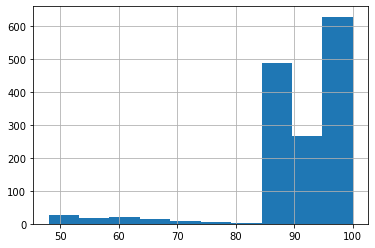

In [10]:
## Show a histogram of the scores
matches_df['score'].hist()


# Print report of the matches
# print(matches_df['score'].describe())

## over 95, over 90, over 85, over 80, over 75, over 70, over 65, over 60, over 55, over 50, over 45, over 40, over 35, over 30, over 25, over 20, over 15, over 10, over 5, over 0
print(matches_df['score'].value_counts(bins=[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50,
                                                55, 60, 65, 70, 75, 80, 85, 90, 95, 100]))

In [ ]:
## Output the csv and see how it the matches are working in tableau
matches_df.to_csv('mhsaa_nces_matches.csv', index=False)

In [11]:
waretewrsg

NameError: name 'waretewrsg' is not defined

In [ ]:
# mhsaa_df.info()

In [ ]:
# school_master.info()

# mhsaa_df.info()



## Remove the out of state teams from the mhsaa_df
## Out of state teams have a ( and ) in the school name

# mhsaa_df = mhsaa_df[~mhsaa_df['ProperName'].str.contains('\(')]

## pair down the mhsaa dataframe to a sample to test the function

mhsaa_df = mhsaa_df.sample(20)





In [ ]:
####### NEW GPT BLOCK #######

## Create new columns in the dataframes for lower case names
mhsaa_df['lower_proper_name'] = mhsaa_df['ProperName'].str.lower()



school_master['lower_school_name'] = school_master['School Name'].str.lower()

school_master['lower_school_name'] = school_master['School Name'].str.lower()

# Do the MATCHING and store the score in a column
matches = []

# Do the MATCHING and store the score in a column
matches = []

for _, nces_row in tqdm.tqdm(school_master.iterrows()):
    nces_name = nces_row['lower_school_name']
    nces_id = nces_row['u_school_id']
    nces_proper_name = nces_row['School Name']
    match = process.extractOne(nces_name, mhsaa_df['lower_proper_name'])
    if match is None:
        matches.append((None, None, nces_name, nces_id, None, None, nces_proper_name, None))
    else:
        match_name, match_score, _ = match  # Ignore the third return value
        mhsaa_row = mhsaa_df.loc[mhsaa_df['lower_proper_name'] == match_name].iloc[0]
        mhsaa_id = mhsaa_row['SchoolId']
        mhsaa_proper_name = mhsaa_row['ProperName']
        mhsaa_popular_name = mhsaa_row['PopularName']
        matches.append((match_name, match_score, nces_name, nces_id, mhsaa_id, mhsaa_popular_name, nces_proper_name, mhsaa_proper_name))

# Create a dataframe of the matches
matches_df = pd.DataFrame(matches, columns=['match', 'score', 'nces_name', 'nces_id', 'mhsaa_id', 'mhsaa_popular', 'nces_proper', 'mhsaa_proper'])

# Display the matches_df head
matches_df.head()


In [ ]:
############## ANOTHER TRUN AT THE MATCHING PROCESS #####################

## want to preserve the original names in each DF because altering them is making things tough in tableau

# Create new columns in the dataframes for lower case names

mhsaa_df['lower_proper_name'] = mhsaa_df['ProperName'].str.replace('High School', 'HS').str.lower()
mhsaa_df = mhsaa_df[~mhsaa_df['lower_proper_name'].str.contains('Middle School')]
mhsaa_df = mhsaa_df[~mhsaa_df['lower_proper_name'].str.contains('\(')]

school_master['lower_school_name'] = school_master['School Name'].str.lower()

# Now, retrieve the lists
mhsaa_names = mhsaa_df['lower_proper_name'].tolist()
nces_names = school_master['lower_school_name'].tolist()

# No changes needed here
nces_ids = school_master['u_school_id'].tolist()
mhsaa_ids = mhsaa_df['SchoolId'].tolist()
nces_proper = school_master['School Name'].tolist()
mhsaa_proper = mhsaa_df['ProperName'].tolist()
mhsaa_popular = mhsaa_df['PopularName'].tolist()





# Do the MATCHING and store the score in a column
matches = []

for nces_name, nces_id, nces_proper_name in tqdm.tqdm(zip(nces_names, nces_ids, nces_proper)):
    match = process.extractOne(nces_name, mhsaa_names)
    if match is None:
        matches.append((None, None, nces_name, nces_id, None, None, nces_proper_name, None))
    else:
        match_name, match_score = match
        match_index = mhsaa_names.index(match_name)  # Get the index of the matched name
        mhsaa_id = mhsaa_ids[match_index]  # Get the corresponding mhsaa_id
        mhsaa_proper_name = mhsaa_proper[match_index]  # Get the corresponding mhsaa proper name
        mhsaa_popular_name = mhsaa_popular[match_index]  # Get the corresponding mhsaa popular name
        matches.append((match_name, match_score, nces_name, nces_id, mhsaa_id, mhsaa_popular_name, nces_proper_name, mhsaa_proper_name))

# create a dataframe of the matches
matches_df = pd.DataFrame(matches, columns=['match', 'score', 'nces_name', 'nces_id', 'mhsaa_id', 'mhsaa_popular', 'nces_proper', 'mhsaa_proper'])

    
    




## Display the matches_df head
matches_df.head(20)

    





In [ ]:
asdfgasdf

In [ ]:
## Change the game_team back to its original form so I can use it to merge
# Replace "High School" with "HS"
matches_df['game_team'] = matches_df['game_team'].str.replace(' High School', ' HS')


## save all matches above 85% to a csv
matches_df[matches_df['score'] >= 85].to_csv('REVERSE_TEST_MATCH.csv', index=False)

In [ ]:
kjhgfvkjhv

In [ ]:
### Take the school name and look for a match in the mhsaa names


# Create a list to hold the matches
matches = []

# Create a list to hold the scores
scores = []

# Create a list to hold the indexes
indexes = []

# Create a list to hold the school names
school_names = []

# Create a list to hold the school ids
mhsaa_ids = []
nces_ids = []

# loop through the school master names and find the best match in the mhsaa names with a status bar
for school in tqdm.tqdm(school_master_names):

    # get the best match
    match = process.extractOne(school, mhsaa_names)
    # append the match to the list
    matches.append(match[0])
    # append the score to the list
    scores.append(match[1])
    # get the index of the match
    index = mhsaa_names.index(match[0])
    # append the index to the list
    indexes.append(index)
    # get the school name
    school_name = mhsaa_df['PopularName'][index]
    # append the school name to the list
    school_names.append(school_name)
    # get the school id
    mhsaa_id = mhsaa_df['SchoolId'][index]
    # append the school id to the list
    mhsaa_ids.append(mhsaa_id)
    
    # append the nces id to the list
    # nces_ids.append(nces_id)

# Create a dataframe from the lists
matches_df = pd.DataFrame({'school_master_name': school_master_names,
                            'match': matches,
                            'score': scores,
                            'index': indexes,
                            'school_name': school_names,
                            'mhsaa_id': mhsaa_ids,
                            })

# print the head of the dataframe
# print(matches_df.head())




In [ ]:
## put the names back into Title Case
matches_df['school_master_name'] = matches_df['school_master_name'].str.title()
matches_df['match'] = matches_df['match'].str.title()
matches_df['school_name'] = matches_df['school_name'].str.title()


## save all matches above 85% to a csv
matches_df[matches_df['score'] >= 90].to_csv('TEST_MATCH.csv', index=False)

In [ ]:
# Try it out the other way around

### Take the school name and look for a match in the mhsaa names


# Create a list to hold the matches
matches = []

# Create a list to hold the scores
scores = []

# Create a list to hold the indexes
indexes = []

# Create a list to hold the school names
school_names = []

# Create a list to hold the school ids
mhsaa_ids = []
nces_ids = []

# loop through the school master names and find the best match in the mhsaa names with a status bar
for school in tqdm.tqdm(mhsaa_names):

    # get the best match
    match = process.extractOne(school, school_master_names)
    # append the match to the list
    matches.append(match[0])
    # append the score to the list
    scores.append(match[1])
    # get the index of the match
    index = mhsaa_names.index(match[0])
    # append the index to the list
    indexes.append(index)
    # get the school name
    school_name = mhsaa_df['ProperName'][index]
    # append the school name to the list
    school_names.append(school_name)
    # get the school id
    mhsaa_id = mhsaa_df['SchoolId'][index]
    # append the school id to the list
    mhsaa_ids.append(mhsaa_id)
    
    # append the nces id to the list
    nces_ids.append(nces_id)

# Create a dataframe from the lists
matches_df = pd.DataFrame({'school_master_name': school_master_names,
                            'match': matches,
                            'score': scores,
                            'index': indexes,
                            'school_name': school_names,
                            'mhsaa_id': mhsaa_ids,
                            })

# print the head of the dataframe
# print(matches_df.head())
